Import Libraries

In [599]:
import numpy as np
import pandas as pd

Reading the Data

In [600]:
a = 'household_power_consumption.txt'
data = pd.read_csv(a, delimiter=';')

C:\Users\abhis\AppData\Local\Temp\ipykernel_20360\3139080465.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(a, delimiter=';')


See the Entries

In [601]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Import the Required Library for Plotting

In [602]:
import matplotlib.pyplot as plt

Datatype of the Columns

In [603]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Deleting Null Values

In [604]:
data.dropna(axis=1, inplace=True)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000


Change the Datatypes Object to Numeric

In [605]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
dtype: object

Scatter [Global Active Power VS Voltage]

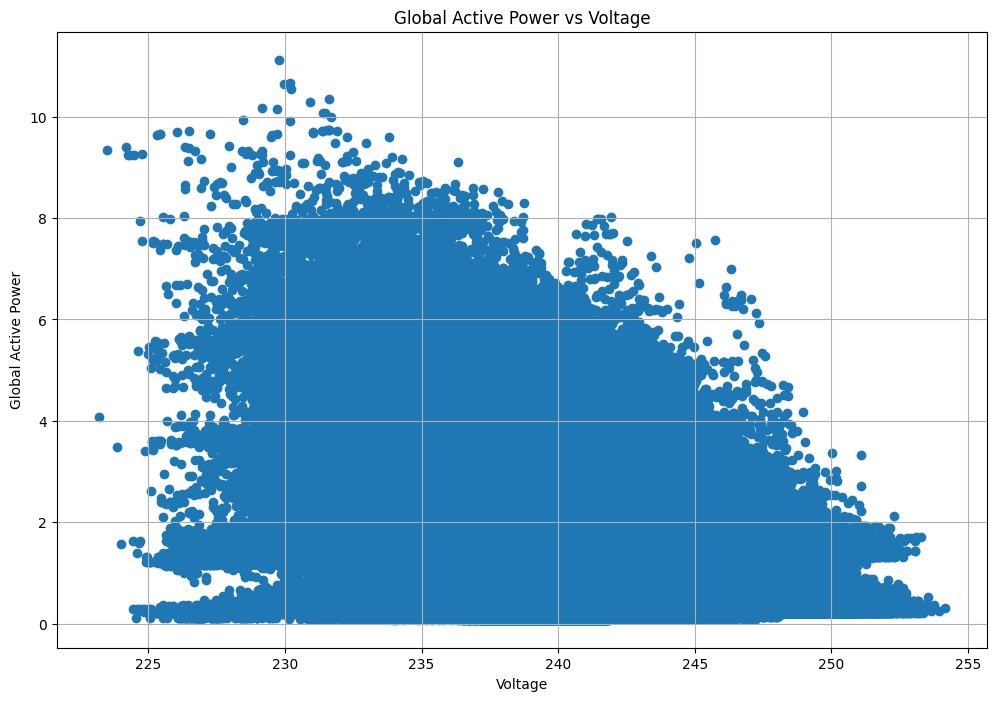

In [606]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Voltage'], data['Global_active_power'])
plt.title('Global Active Power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

Scatter [Global Reactive Power VS Voltage]

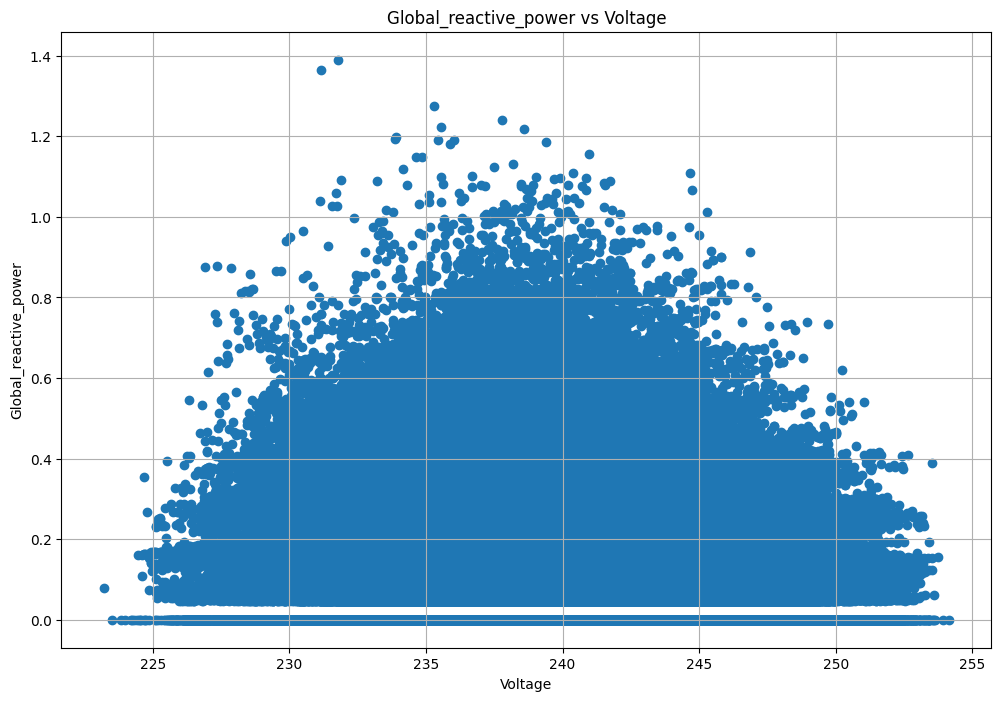

In [607]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Voltage'], data['Global_reactive_power'])
plt.title('Global_reactive_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_reactive_power')
plt.grid(True)
plt.show()

Spliting the Date into Day , Month & Year Separately

In [608]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.head()

C:\Users\abhis\AppData\Local\Temp\ipykernel_20360\1056378427.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Day,Month,Year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,16,12,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16,12,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,16,12,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,16,12,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,16,12,2006


Monthly Summary Of Voltage

In [609]:
monthly_summary_voltage = data.groupby(['Year','Month'])['Voltage'].sum().reset_index()
print(monthly_summary_voltage)

    Year  Month      Voltage
0   2006     12   5309773.22
1   2007      1  10753521.91
2   2007      2   9697260.78
3   2007      3  10736280.75
4   2007      4   9450794.83
5   2007      5  10498362.16
6   2007      6  10309151.25
7   2007      7  10578509.55
8   2007      8  10616283.84
9   2007      9  10342642.60
10  2007     10  10700881.41
11  2007     11  10405070.38
12  2007     12  10790396.33
13  2008      1  10742211.50
14  2008      2  10046857.96
15  2008      3  10772523.43
16  2008      4  10420755.46
17  2008      5  10729543.15
18  2008      6  10323489.14
19  2008      7  10702890.14
20  2008      8  10732450.56
21  2008      9  10373381.89
22  2008     10  10717968.88
23  2008     11  10391188.27
24  2008     12  10834008.18
25  2009      1  10882685.36
26  2009      2   9758014.49
27  2009      3  10815949.79
28  2009      4  10438073.71
29  2009      5  10717942.42
30  2009      6   9616389.45
31  2009      7  10802709.17
32  2009      8  10555310.81
33  2009      

Monthly Summary Of Global Active Power

In [610]:
monthly_summary_Global_active_power = data.groupby(['Year','Month'])['Global_active_power'].sum().reset_index()
print(monthly_summary_Global_active_power)

    Year  Month  Global_active_power
0   2006     12            41813.282
1   2007      1            69011.862
2   2007      2            56488.886
3   2007      3            58862.192
4   2007      4            35181.466
5   2007      5            44008.872
6   2007      6            35682.828
7   2007      7            29703.830
8   2007      8            34096.460
9   2007      9            41872.606
10  2007     10            49276.370
11  2007     11            55918.644
12  2007     12            72604.170
13  2008      1            65169.382
14  2008      2            49331.072
15  2008      3            55590.594
16  2008      4            48209.992
17  2008      5            45721.860
18  2008      6            42943.972
19  2008      7            35477.418
20  2008      8            12341.880
21  2008      9            42667.792
22  2008     10            50696.460
23  2008     11            59908.760
24  2008     12            56833.912
25  2009      1            62950.008
2

Monthly Summary Of Global Reactive Power 

In [611]:
monthly_summary_Global_reactive_power = data.groupby(['Year','Month'])['Global_reactive_power'].sum().reset_index()
print(monthly_summary_Global_reactive_power)

    Year  Month  Global_reactive_power
0   2006     12               2889.436
1   2007      1               5922.396
2   2007      2               4581.608
3   2007      3               5122.184
4   2007      4               4688.994
5   2007      5               5148.894
6   2007      6               6317.980
7   2007      7               5674.062
8   2007      8               5033.644
9   2007      9               5443.416
10  2007     10               4171.170
11  2007     11               4170.904
12  2007     12               4950.484
13  2008      1               3908.238
14  2008      2               3639.688
15  2008      3               4531.466
16  2008      4               5361.760
17  2008      5               6896.588
18  2008      6               6550.438
19  2008      7               6551.446
20  2008      8               5705.046
21  2008      9               5399.154
22  2008     10               4712.902
23  2008     11               4377.654
24  2008     12          

Monthy Summary Of Global Intensity

In [612]:
monthly_summary_Global_intensity = data.groupby(['Year','Month'])['Global_intensity'].sum().reset_index()
print(monthly_summary_Global_intensity)

    Year  Month  Global_intensity
0   2006     12          176594.8
1   2007      1          292241.2
2   2007      2          238463.6
3   2007      3          248772.2
4   2007      4          151026.2
5   2007      5          191838.8
6   2007      6          155518.4
7   2007      7          131040.4
8   2007      8          147804.6
9   2007      9          180334.8
10  2007     10          208779.8
11  2007     11          235253.8
12  2007     12          304418.2
13  2008      1          275945.6
14  2008      2          207710.2
15  2008      3          233677.6
16  2008      4          202913.0
17  2008      5          195697.2
18  2008      6          185819.0
19  2008      7          154611.8
20  2008      8           56403.2
21  2008      9          181973.4
22  2008     10          213963.0
23  2008     11          253310.8
24  2008     12          236433.6
25  2009      1          261900.2
26  2009      2          209344.2
27  2009      3          229840.0
28  2009      

Monthly Summary Of Sub Metering 1

In [613]:
monthly_summary_Sub_metering_1 = data.groupby(['Year','Month'])['Sub_metering_1'].sum().reset_index()
print(monthly_summary_Sub_metering_1)

    Year  Month  Sub_metering_1
0   2006     12         27460.0
1   2007      1         56433.0
2   2007      2         47584.0
3   2007      3         60769.0
4   2007      4         42078.0
5   2007      5         75737.0
6   2007      6         59672.0
7   2007      7         43052.0
8   2007      8         36251.0
9   2007      9         52841.0
10  2007     10         43218.0
11  2007     11         50823.0
12  2007     12         74090.0
13  2008      1         61761.0
14  2008      2         40192.0
15  2008      3         63110.0
16  2008      4         47080.0
17  2008      5         53084.0
18  2008      6         68728.0
19  2008      7         47313.0
20  2008      8          3873.0
21  2008      9         52376.0
22  2008     10         44093.0
23  2008     11         58067.0
24  2008     12         45107.0
25  2009      1         74651.0
26  2009      2         47098.0
27  2009      3         64645.0
28  2009      4         54506.0
29  2009      5         43570.0
30  2009

Monthly Summary Of Sub Metering 2

In [614]:
monthly_summary_Sub_metering_2 = data.groupby(['Year','Month'])['Sub_metering_2'].sum().reset_index()
print(monthly_summary_Sub_metering_2)

    Year  Month  Sub_metering_2
0   2006     12         48712.0
1   2007      1         79274.0
2   2007      2         64604.0
3   2007      3        104762.0
4   2007      4         38417.0
5   2007      5         72132.0
6   2007      6         69939.0
7   2007      7         55733.0
8   2007      8         49711.0
9   2007      9         75277.0
10  2007     10         87914.0
11  2007     11         73666.0
12  2007     12         82931.0
13  2008      1         62911.0
14  2008      2         56646.0
15  2008      3         79277.0
16  2008      4         70871.0
17  2008      5         58907.0
18  2008      6         63449.0
19  2008      7         44416.0
20  2008      8         22264.0
21  2008      9         44590.0
22  2008     10         63228.0
23  2008     11         55887.0
24  2008     12         39459.0
25  2009      1         72952.0
26  2009      2         50684.0
27  2009      3         48427.0
28  2009      4         52601.0
29  2009      5         50099.0
30  2009

Histogram of Monthly Summary Voltage vs Sub metering 1 for the Year 2007

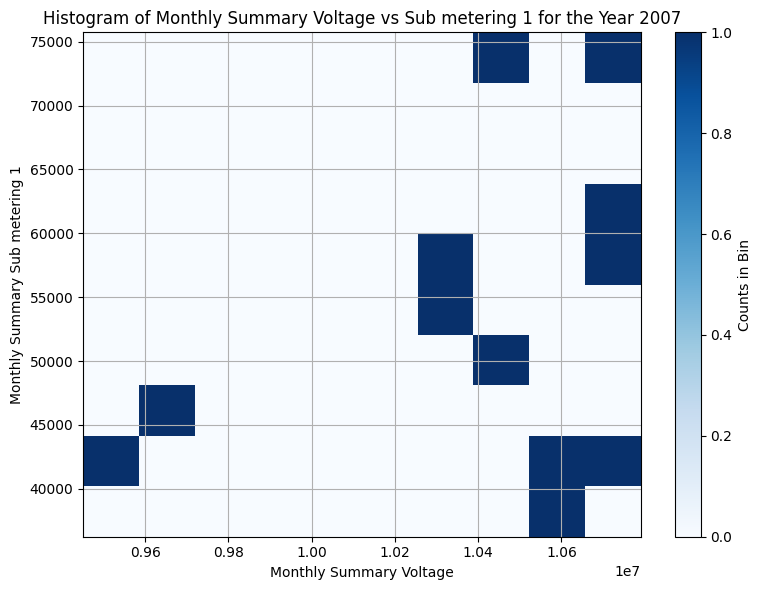

In [615]:
merged_data = pd.merge(monthly_summary_voltage, monthly_summary_Sub_metering_1, on=['Year', 'Month'])

data_2007 = merged_data[merged_data['Year'] == 2007]

plt.figure(figsize=(8, 6))
plt.hist2d(data_2007['Voltage'], data_2007['Sub_metering_1'], bins=10, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Sub metering 1')
plt.title('Histogram of Monthly Summary Voltage vs Sub metering 1 for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot of Monthly Summary Voltage vs Sub metering 1 for the Year 2007

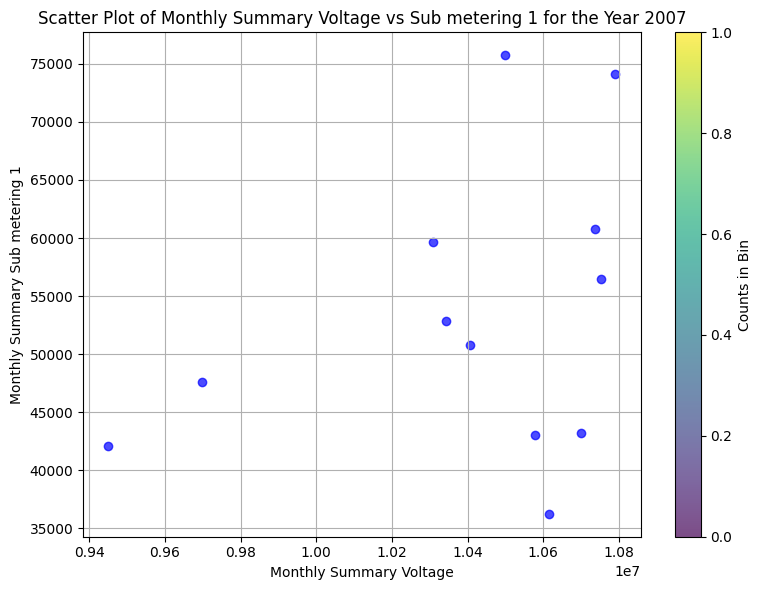

In [616]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2007['Voltage'], data_2007['Sub_metering_1'], c='blue', alpha=0.7)
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Sub metering 1')
plt.title('Scatter Plot of Monthly Summary Voltage vs Sub metering 1 for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart of Monthly Summary Voltage vs Monthly Summary Sub metering 1 for the Year 2007

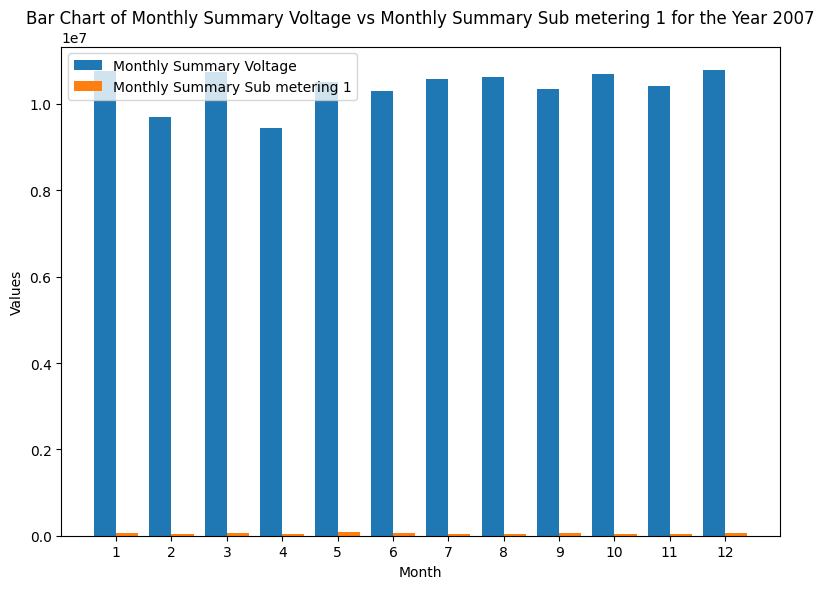

In [617]:
plt.figure(figsize=(8, 6))
bar_width = 0.40

plt.bar(data_2007['Month'], data_2007['Voltage'], bar_width, label='Monthly Summary Voltage')
plt.bar(data_2007['Month'] + bar_width, data_2007['Sub_metering_1'], bar_width, label='Monthly Summary Sub metering 1')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Bar Chart of Monthly Summary Voltage vs Monthly Summary Sub metering 1 for the Year 2007')
plt.xticks(data_2007['Month'] + bar_width / 2, data_2007['Month']) 
plt.legend()
plt.tight_layout()
plt.show()

Histogram of Monthly Summary Voltage vs Sub metering 2 for the Year 2007

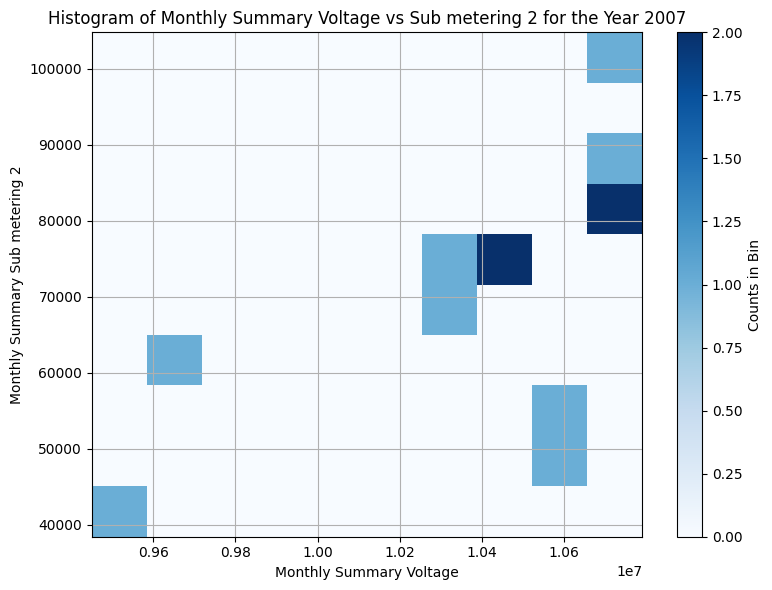

In [618]:
merged_data = pd.merge(monthly_summary_voltage, monthly_summary_Sub_metering_2, on=['Year', 'Month'])

data_2007 = merged_data[merged_data['Year'] == 2007]

plt.figure(figsize=(8, 6))
plt.hist2d(data_2007['Voltage'], data_2007['Sub_metering_2'], bins=10, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Sub metering 2')
plt.title('Histogram of Monthly Summary Voltage vs Sub metering 2 for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot of Monthly Summary Voltage vs Sub metering 2 for the Year 2007

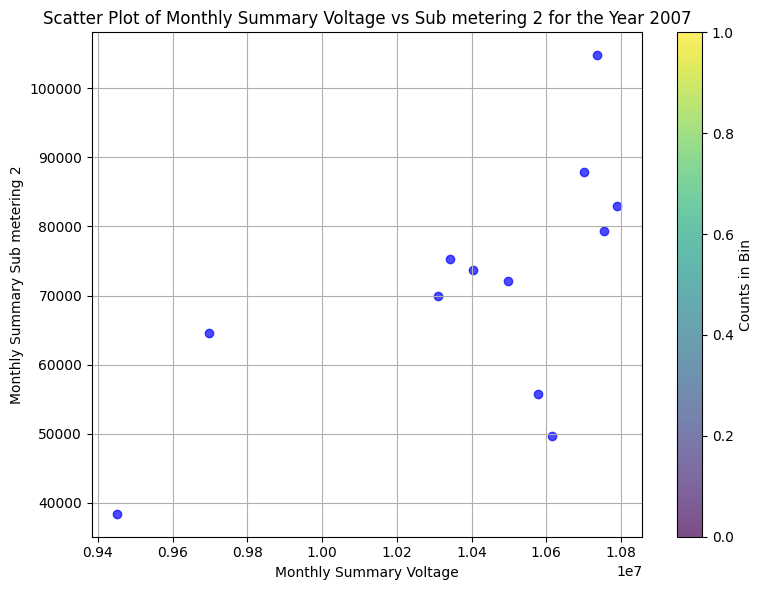

In [619]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2007['Voltage'], data_2007['Sub_metering_2'], c='blue', alpha=0.7)
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Sub metering 2')
plt.title('Scatter Plot of Monthly Summary Voltage vs Sub metering 2 for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart of Monthly Summary Voltage vs Monthly Summary Sub metering 2 for the Year 2007

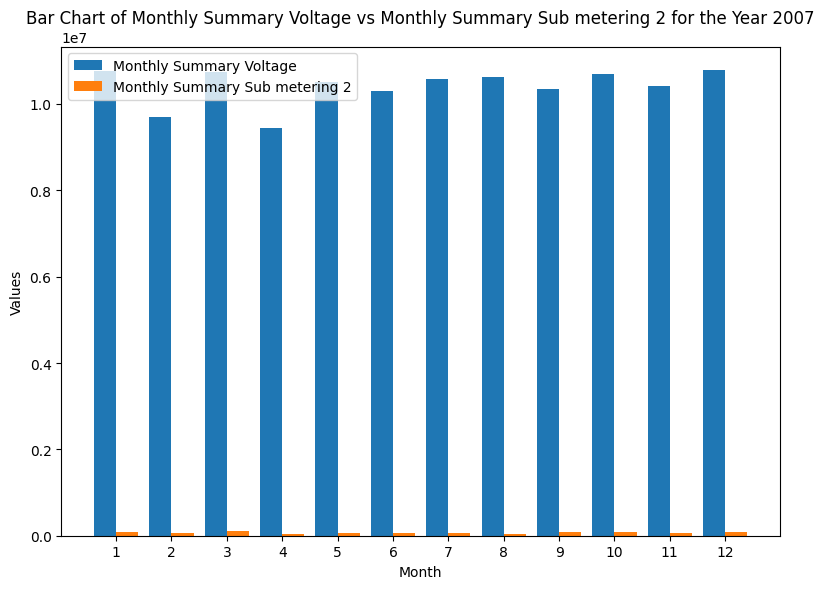

In [620]:
plt.figure(figsize=(8, 6))
bar_width = 0.40

plt.bar(data_2007['Month'], data_2007['Voltage'], bar_width, label='Monthly Summary Voltage')
plt.bar(data_2007['Month'] + bar_width, data_2007['Sub_metering_2'], bar_width, label='Monthly Summary Sub metering 2')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Bar Chart of Monthly Summary Voltage vs Monthly Summary Sub metering 2 for the Year 2007')
plt.xticks(data_2007['Month'] + bar_width / 2, data_2007['Month']) 
plt.legend()
plt.tight_layout()
plt.show()

Histogram of Monthly Summary Voltage vs Global Intensity for the Year 2007

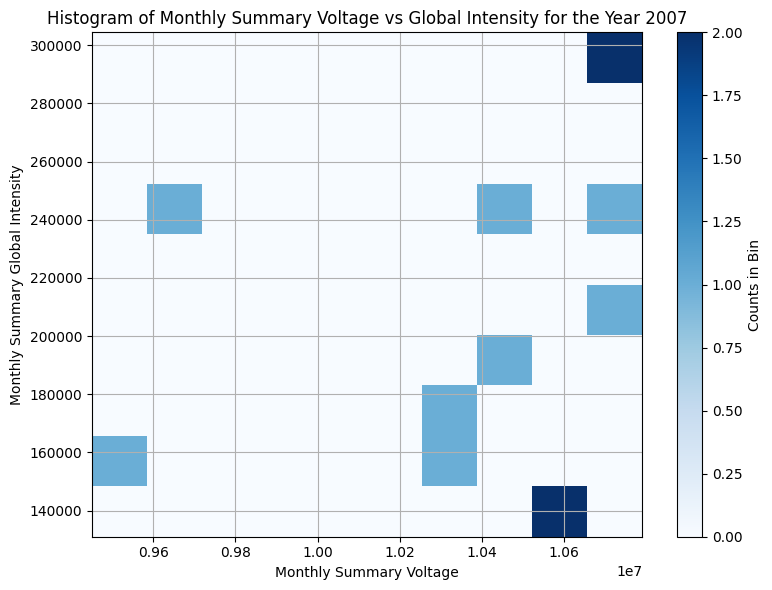

In [621]:
merged_data = pd.merge(monthly_summary_voltage, monthly_summary_Global_intensity, on=['Year', 'Month'])

data_2007 = merged_data[merged_data['Year'] == 2007]

plt.figure(figsize=(8, 6))
plt.hist2d(data_2007['Voltage'], data_2007['Global_intensity'], bins=10, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Intensity')
plt.title('Histogram of Monthly Summary Voltage vs Global Intensity for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot of Monthly Summary Voltage vs Global Intensity for the Year 2007

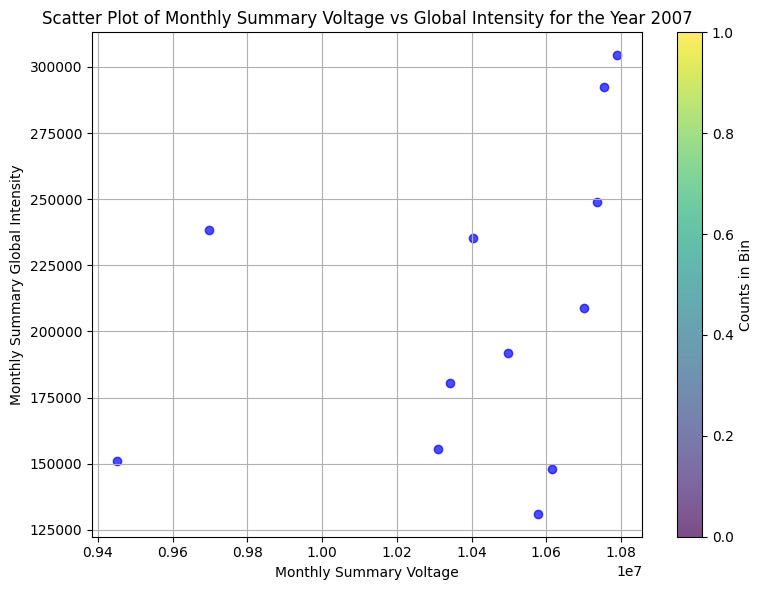

In [622]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2007['Voltage'], data_2007['Global_intensity'], c='blue', alpha=0.7)
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Intensity')
plt.title('Scatter Plot of Monthly Summary Voltage vs Global Intensity for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart of Monthly Summary Voltage vs Global Intensity for the Year 2007

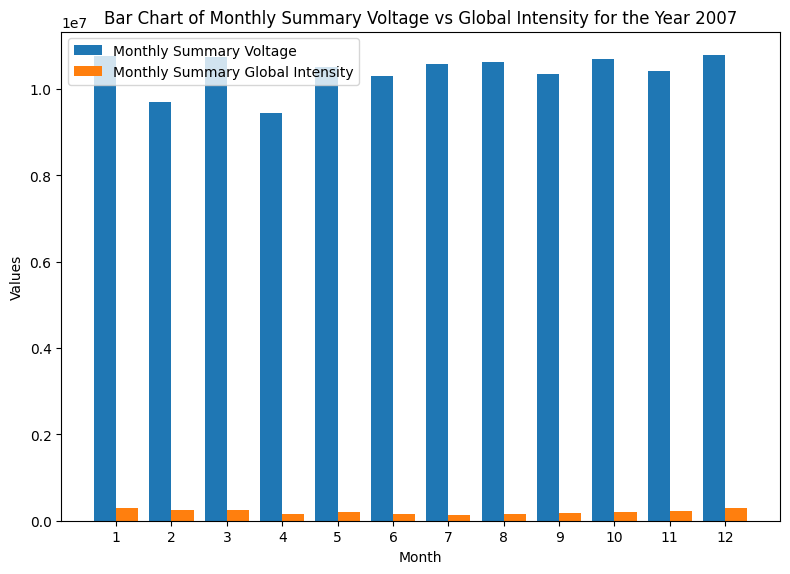

In [623]:
plt.figure(figsize=(8, 6))
bar_width = 0.40

plt.bar(data_2007['Month'], data_2007['Voltage'], bar_width, label='Monthly Summary Voltage')
plt.bar(data_2007['Month'] + bar_width, data_2007['Global_intensity'], bar_width, label='Monthly Summary Global Intensity')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Bar Chart of Monthly Summary Voltage vs Global Intensity for the Year 2007')
plt.xticks(data_2007['Month'] + bar_width / 2, data_2007['Month']) 
plt.legend()
plt.tight_layout()
plt.show()

Histogram of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007

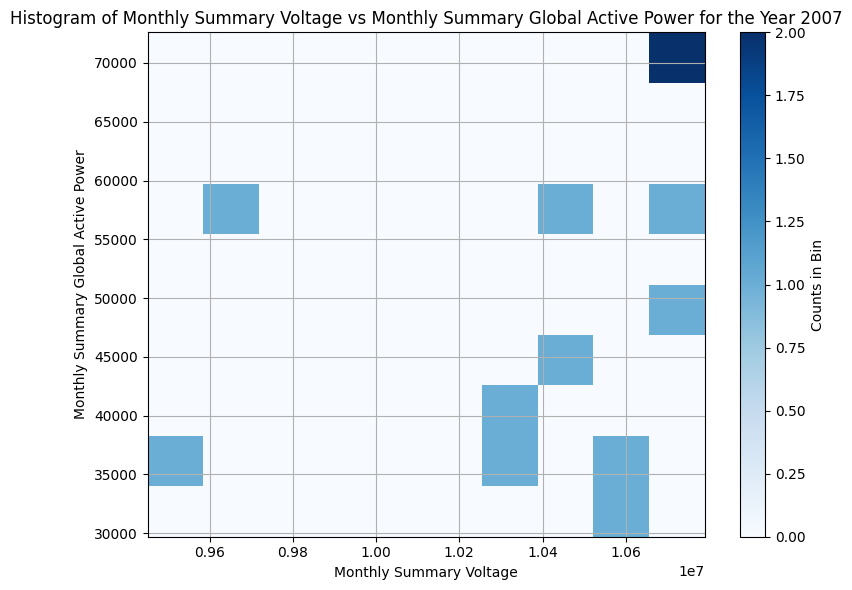

In [624]:
merged_data = pd.merge(monthly_summary_voltage, monthly_summary_Global_active_power, on=['Year', 'Month'])

data_2007 = merged_data[merged_data['Year'] == 2007]

plt.figure(figsize=(8, 6))
plt.hist2d(data_2007['Voltage'], data_2007['Global_active_power'], bins=10, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Active Power')
plt.title('Histogram of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Scatter Plot of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007

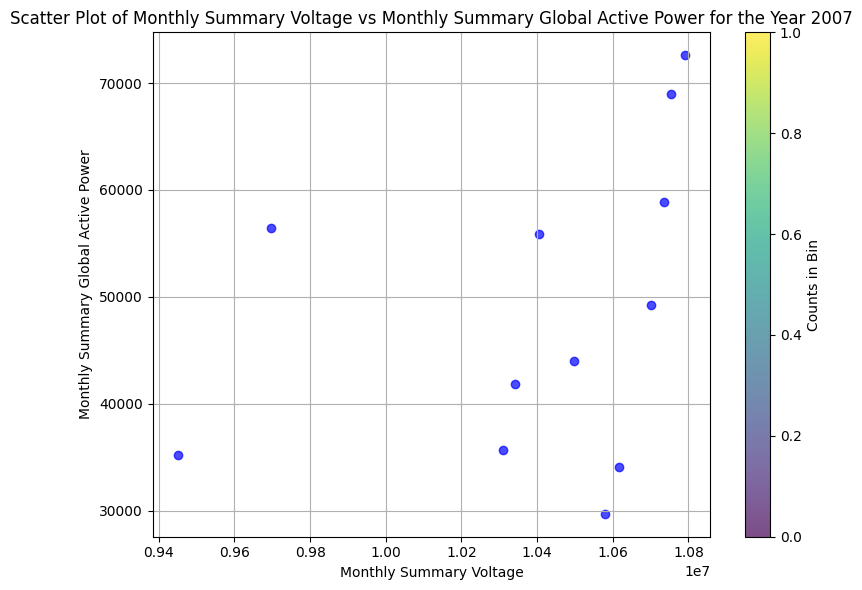

In [625]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2007['Voltage'], data_2007['Global_active_power'], c='blue', alpha=0.7)
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Active Power')
plt.title('Scatter Plot of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007

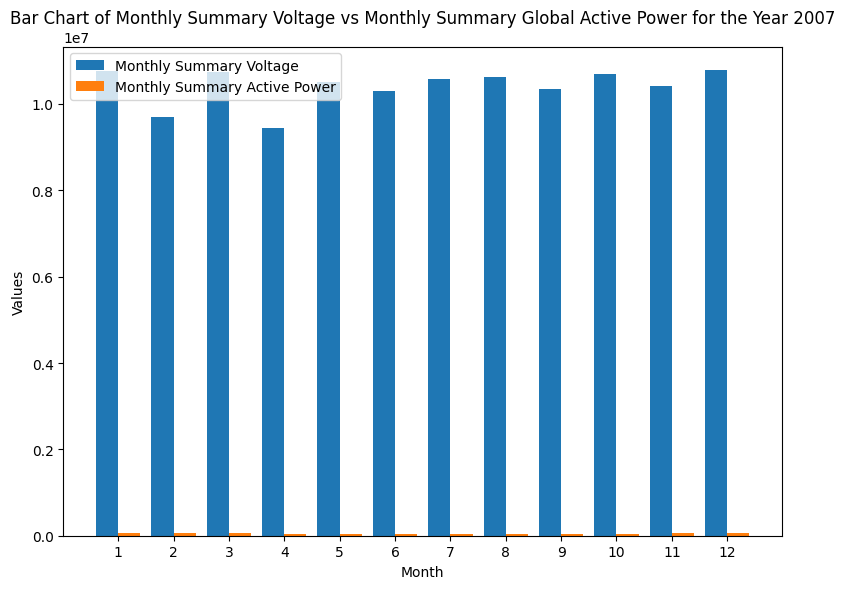

In [626]:
plt.figure(figsize=(8, 6))
bar_width = 0.40

plt.bar(data_2007['Month'], data_2007['Voltage'], bar_width, label='Monthly Summary Voltage')
plt.bar(data_2007['Month'] + bar_width, data_2007['Global_active_power'], bar_width, label='Monthly Summary Active Power')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Bar Chart of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007')
plt.xticks(data_2007['Month'] + bar_width / 2, data_2007['Month']) 
plt.legend()
plt.tight_layout()
plt.show()

Histogram of Monthly Summary Voltage vs Monthly Summary Global Reactive Power for the Year 2007

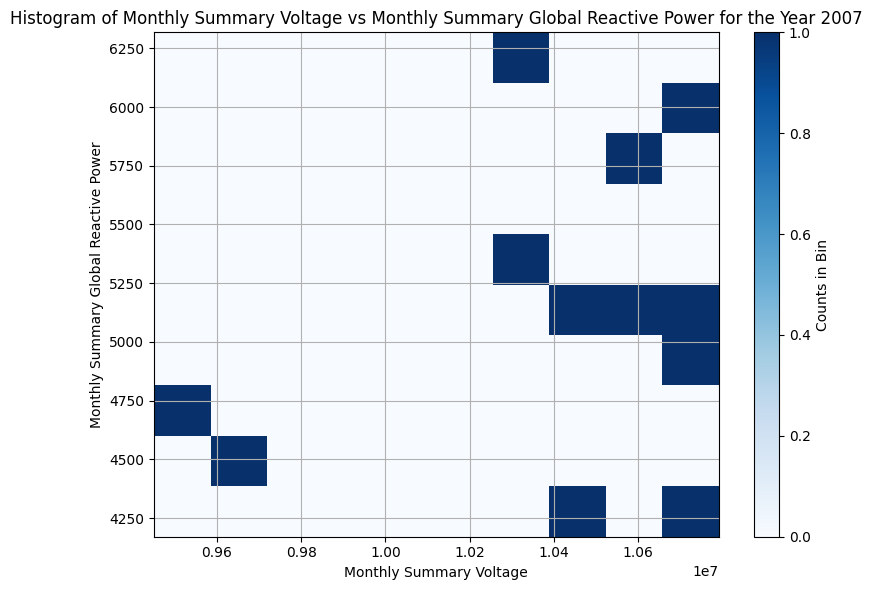

In [627]:
merged_data = pd.merge(monthly_summary_voltage, monthly_summary_Global_reactive_power, on=['Year', 'Month'])

data_2007 = merged_data[merged_data['Year'] == 2007]

plt.figure(figsize=(8, 6))
plt.hist2d(data_2007['Voltage'], data_2007['Global_reactive_power'], bins=10, cmap='Blues')
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Reactive Power')
plt.title('Histogram of Monthly Summary Voltage vs Monthly Summary Global Reactive Power for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Histogram of Monthly Summary Voltage vs Monthly Summary Global Reactive Power for the Year 2007

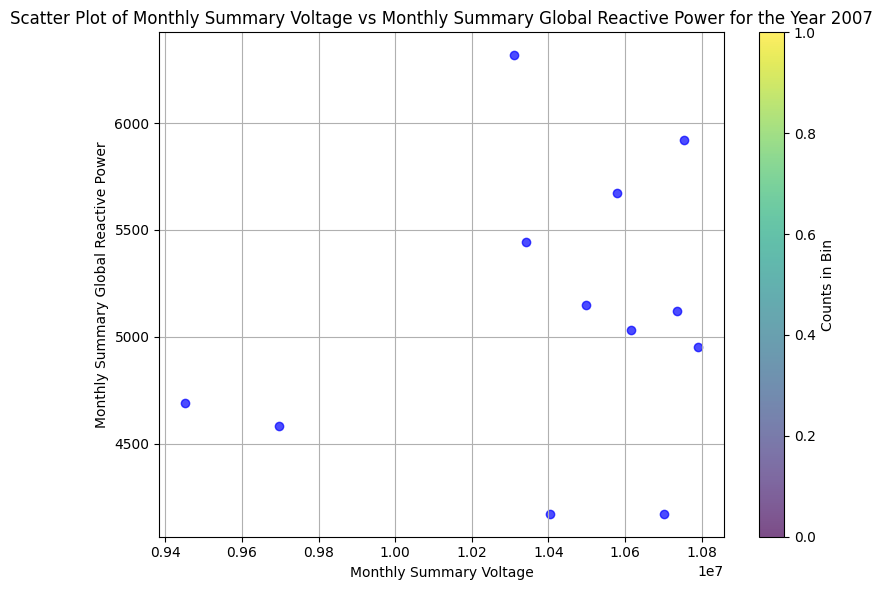

In [628]:
plt.figure(figsize=(8, 6))
plt.scatter(data_2007['Voltage'], data_2007['Global_reactive_power'], c='blue', alpha=0.7)
plt.colorbar(label='Counts in Bin')
plt.xlabel('Monthly Summary Voltage')
plt.ylabel('Monthly Summary Global Reactive Power')
plt.title('Scatter Plot of Monthly Summary Voltage vs Monthly Summary Global Reactive Power for the Year 2007')
plt.grid(True)
plt.tight_layout()
plt.show()

Bar Chart of Monthly Summary Voltage vs Monthly Summary Global Active Power for the Year 2007

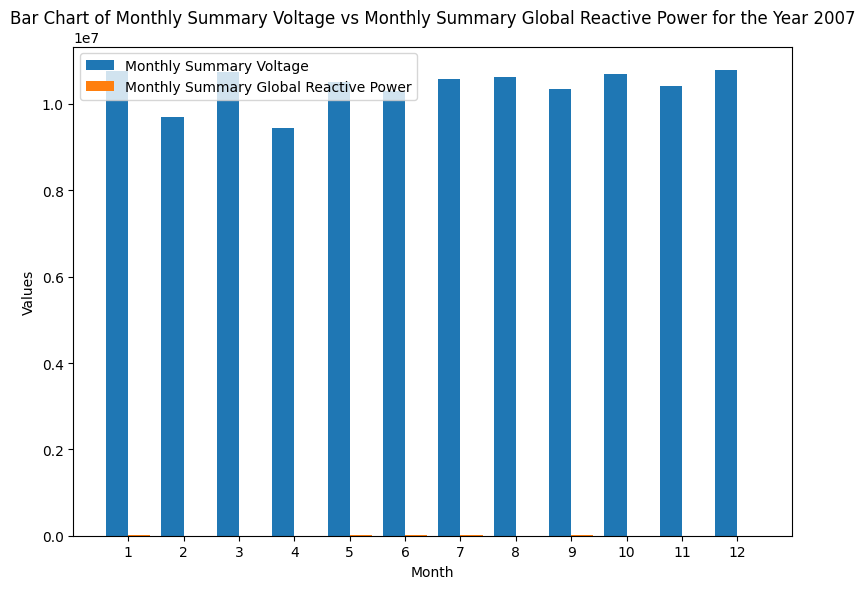

In [629]:
plt.figure(figsize=(8, 6))
bar_width = 0.40

plt.bar(data_2007['Month'], data_2007['Voltage'], bar_width, label='Monthly Summary Voltage')
plt.bar(data_2007['Month'] + bar_width, data_2007['Global_reactive_power'], bar_width, label='Monthly Summary Global Reactive Power')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Bar Chart of Monthly Summary Voltage vs Monthly Summary Global Reactive Power for the Year 2007')
plt.xticks(data_2007['Month'] + bar_width / 2, data_2007['Month']) 
plt.legend()
plt.tight_layout()
plt.show()

Weekly Average Of Global Intensity

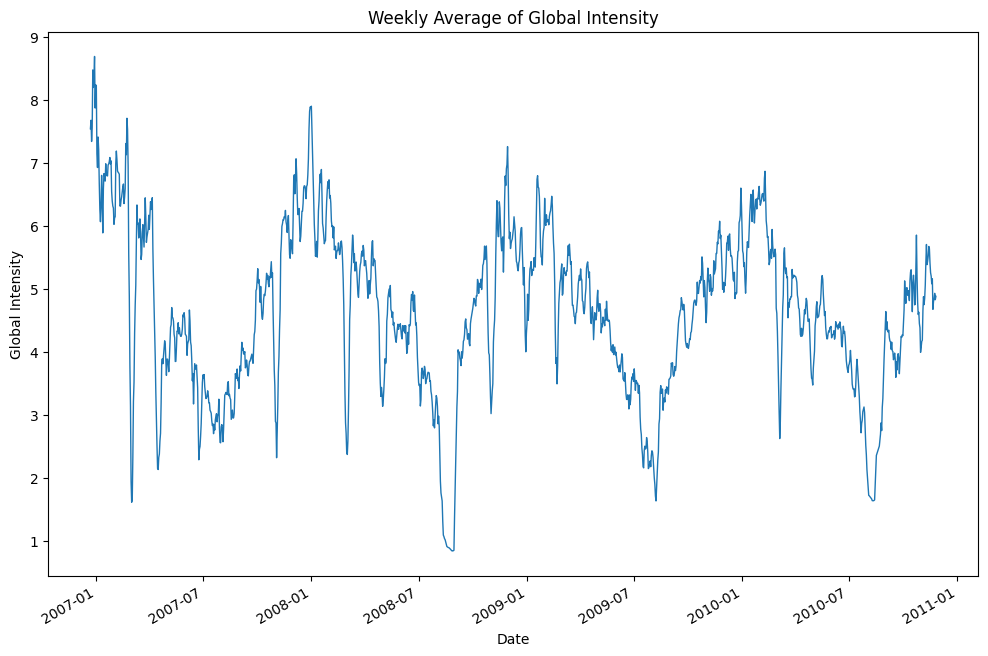

In [630]:
data['Date'] = pd.to_datetime(data['Date'])

missing_values = data['Global_intensity'].isnull().sum()
if missing_values > 0:
    data = data.dropna(subset=['Global_intensity'])

mean_global_intensity_per_date = data.groupby('Date')['Global_intensity'].mean()

weekly_avg = mean_global_intensity_per_date.rolling(7).mean()

plt.figure(figsize=(12, 8))
weekly_avg.plot(linewidth=1)
plt.ylabel('Global Intensity')
plt.title('Weekly Average of Global Intensity')
plt.show()

Voltage Vs Time

Text(0.5, 1.0, '1-HOUR AVERAGE')

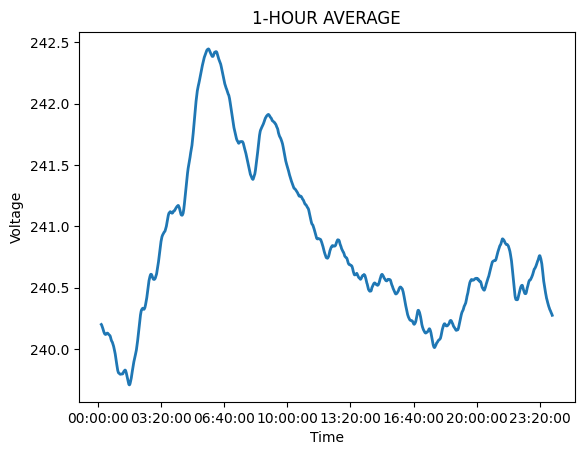

In [631]:
data.groupby(['Voltage']).count().sort_values('Time',ascending=False)
data['Voltage']=data['Voltage'].replace({'?':240.8})
data['Voltage']=pd.DataFrame(np.array(data['Voltage'],dtype='float32'))
data.groupby(['Time']).mean()['Voltage'].rolling(12).mean().plot(linewidth=2)
plt.ylabel('Voltage')
plt.title('1-HOUR AVERAGE')

Weekly Average For Sub Metering 1

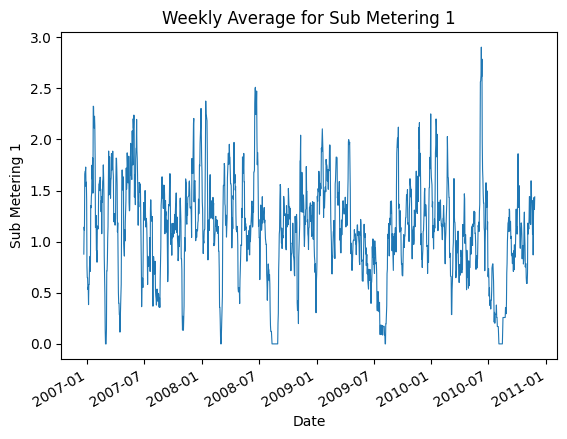

In [632]:
data.groupby('Date')['Sub_metering_1'].mean().rolling(7).mean().plot(linewidth=0.8)
plt.ylabel('Sub Metering 1')
plt.title('Weekly Average for Sub Metering 1')
plt.show()

Sub Metering 1 VS Time

Text(0.5, 1.0, '1-HOUR AVERAGE')

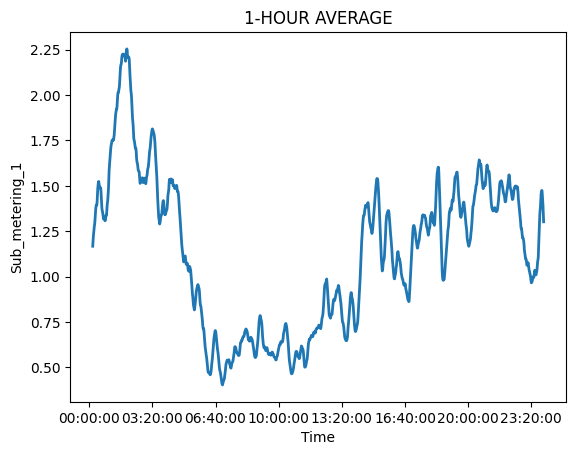

In [633]:
data.groupby(['Sub_metering_1']).count().sort_values('Time',ascending=False)
data['Sub_metering_1']=data['Sub_metering_1'].replace({'?':240.8})
data['Sub_metering_1']=pd.DataFrame(np.array(data['Sub_metering_1'],dtype='float32'))
data.groupby(['Time']).mean()['Sub_metering_1'].rolling(12).mean().plot(linewidth=2)
plt.ylabel('Sub_metering_1')
plt.title('1-HOUR AVERAGE')

Weekly Average For Sub Metering 2

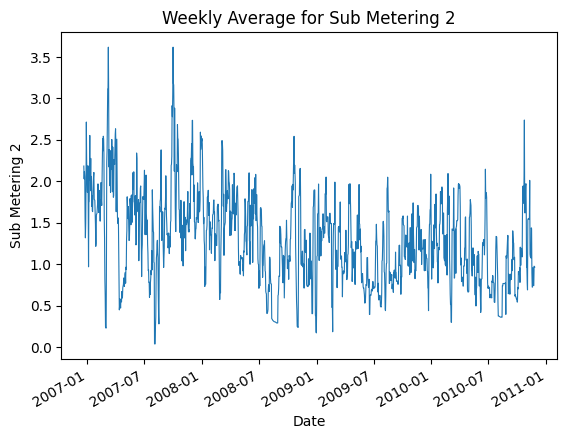

In [634]:
data.groupby('Date')['Sub_metering_2'].mean().rolling(7).mean().plot(linewidth=0.8)
plt.ylabel('Sub Metering 2')
plt.title('Weekly Average for Sub Metering 2')
plt.show()

Sub metering 2 VS Time

Text(0.5, 1.0, '1-HOUR AVERAGE')

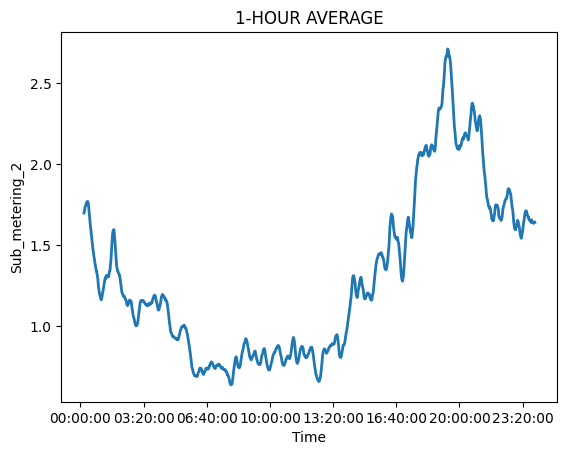

In [635]:
data.groupby(['Sub_metering_2']).count().sort_values('Time',ascending=False)
data['Sub_metering_2']=data['Sub_metering_2'].replace({'?':240.8})
data['Sub_metering_2']=pd.DataFrame(np.array(data['Sub_metering_2'],dtype='float32'))
data.groupby(['Time']).mean()['Sub_metering_2'].rolling(12).mean().plot(linewidth=2)
plt.ylabel('Sub_metering_2')
plt.title('1-HOUR AVERAGE')

Weekly Average For Global Intensity

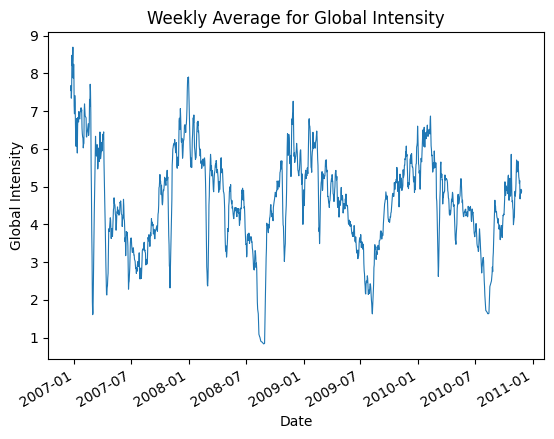

In [638]:
data.groupby('Date')['Global_intensity'].mean().rolling(7).mean().plot(linewidth=0.8)
plt.ylabel('Global Intensity')
plt.title('Weekly Average for Global Intensity')
plt.show()

Weekly Average For Global Active Power

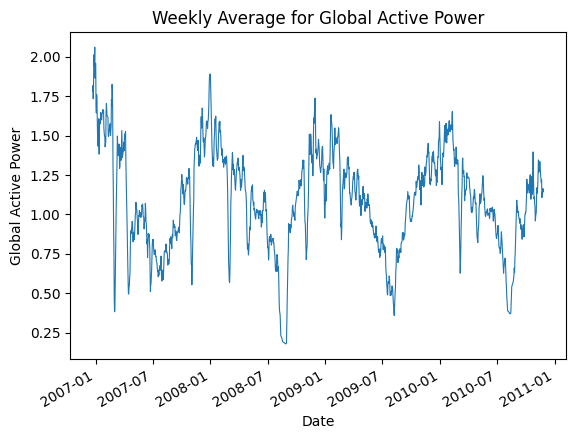

In [639]:
data.groupby('Date')['Global_active_power'].mean().rolling(7).mean().plot(linewidth=0.8)
plt.ylabel('Global Active Power')
plt.title('Weekly Average for Global Active Power')
plt.show()

Weekly Average for Global Reactive Power

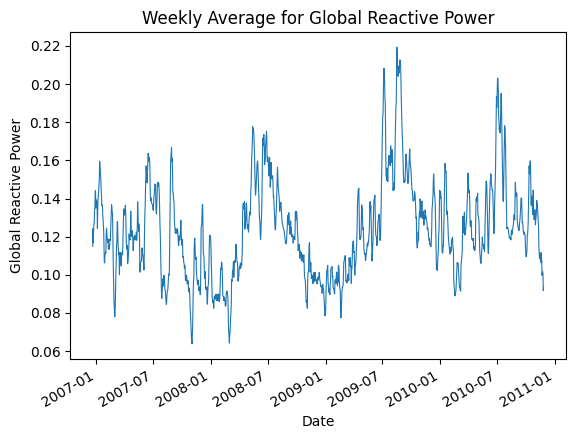

In [640]:
data.groupby('Date')['Global_reactive_power'].mean().rolling(7).mean().plot(linewidth=0.8)
plt.ylabel('Global Reactive Power')
plt.title('Weekly Average for Global Reactive Power')
plt.show()